In [1]:
from utils.enhancement import enhance_full_image
from utils.slicing import slice_grid
from utils.visualization import show_before_after

import cv2
import os
import matplotlib.pyplot as plt



Processing folder: puzzle_2x2
Preview → 0.jpg


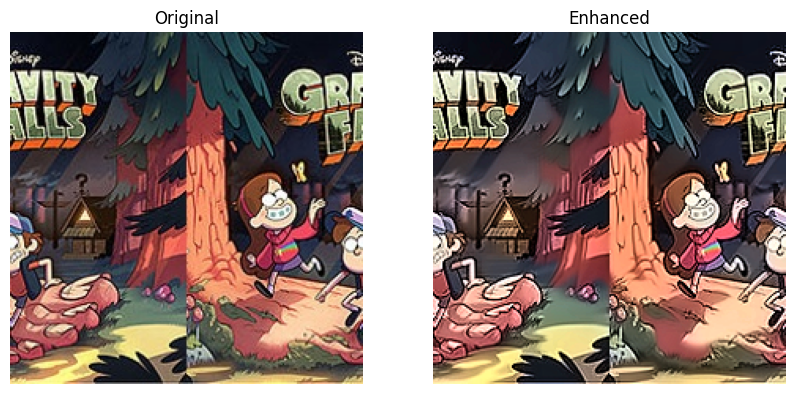

Preview → 1.jpg


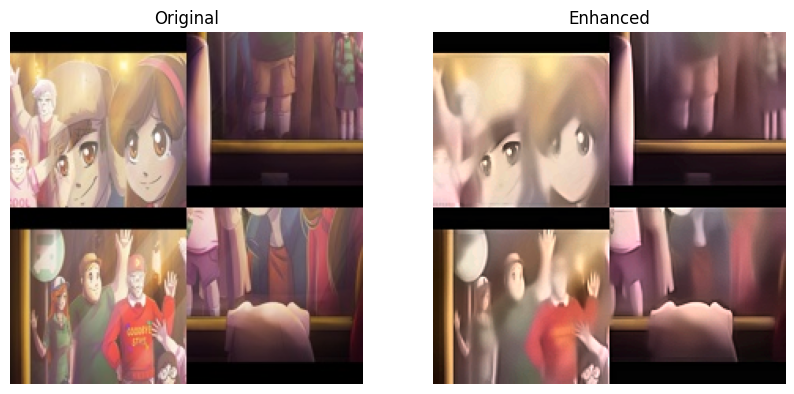

Preview → 10.jpg


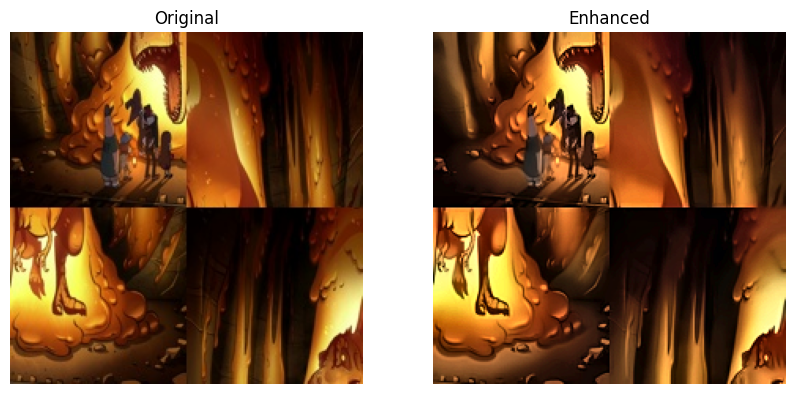

Preview → 100.jpg


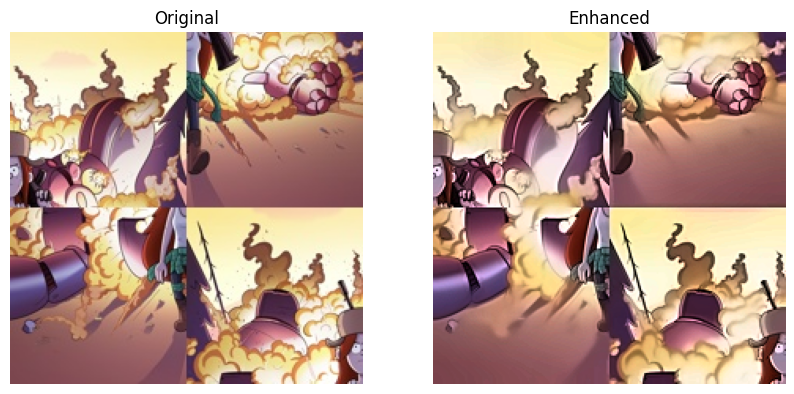

Preview → 101.jpg


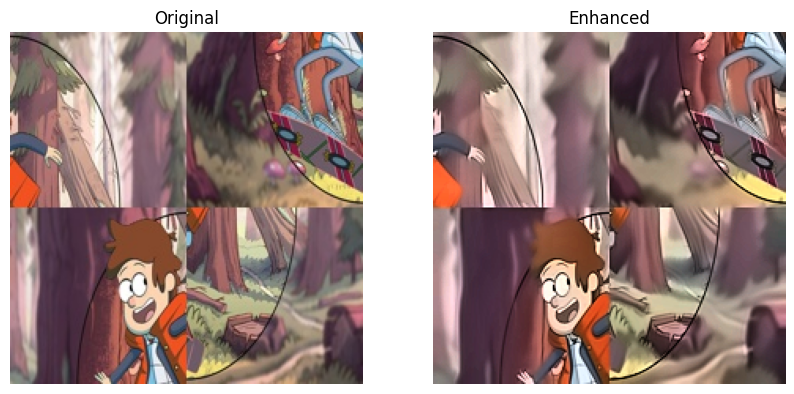


Processing folder: puzzle_4x4
Preview → 0.jpg


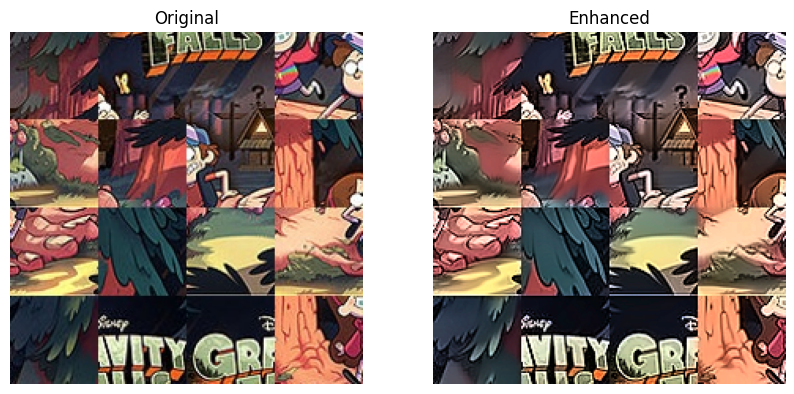

Preview → 1.jpg


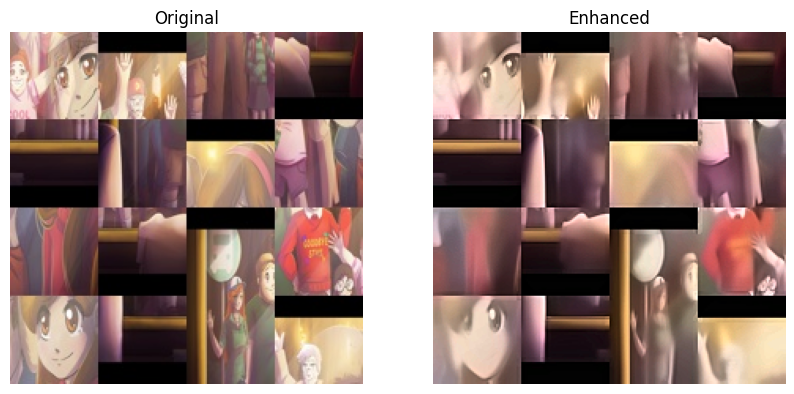

Preview → 10.jpg


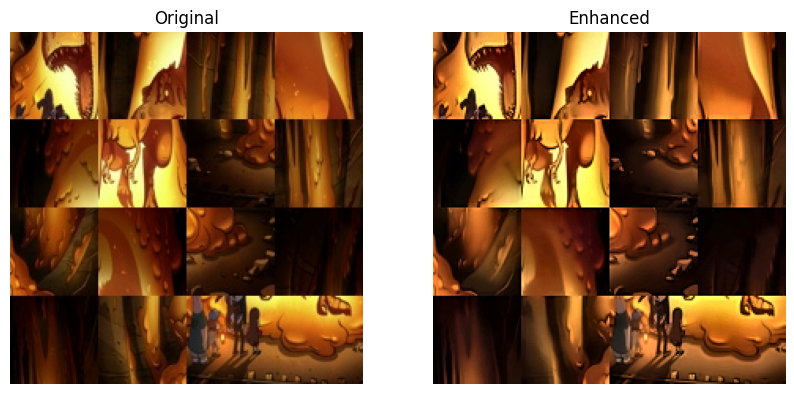

Preview → 100.jpg


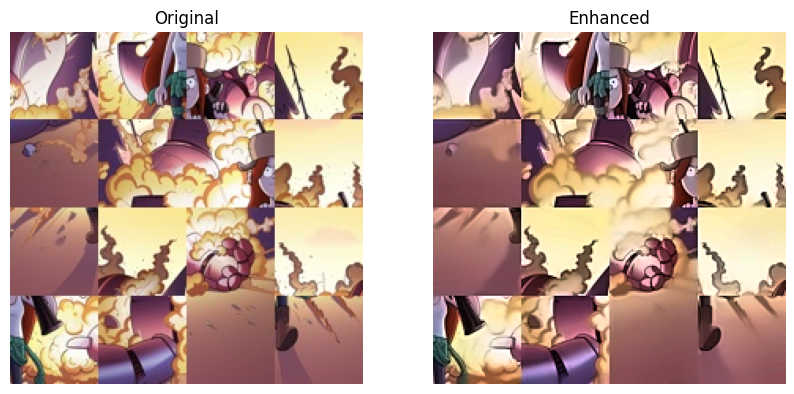

Preview → 101.jpg


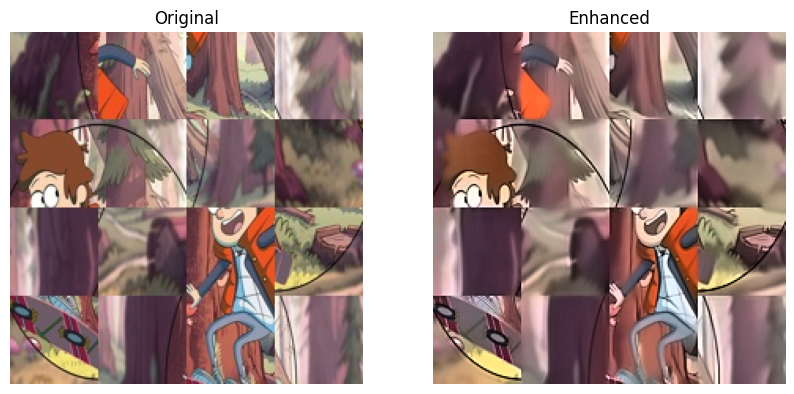


Processing folder: puzzle_8x8
Preview → 0.jpg


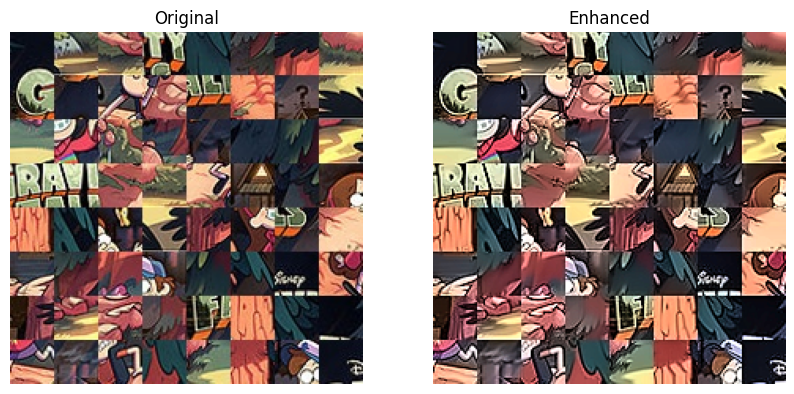

Preview → 1.jpg


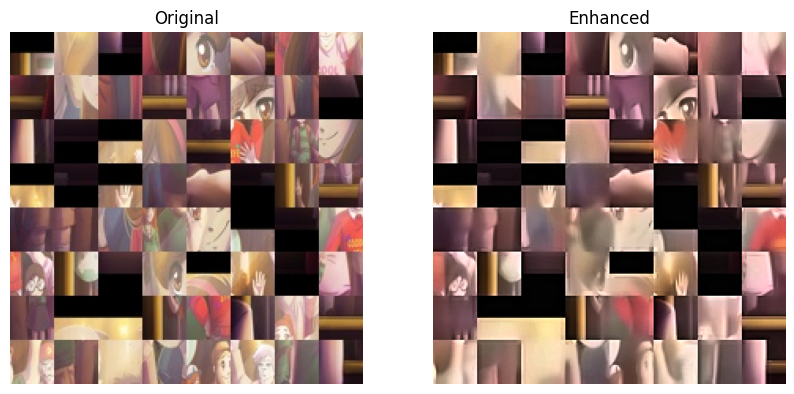

Preview → 10.jpg


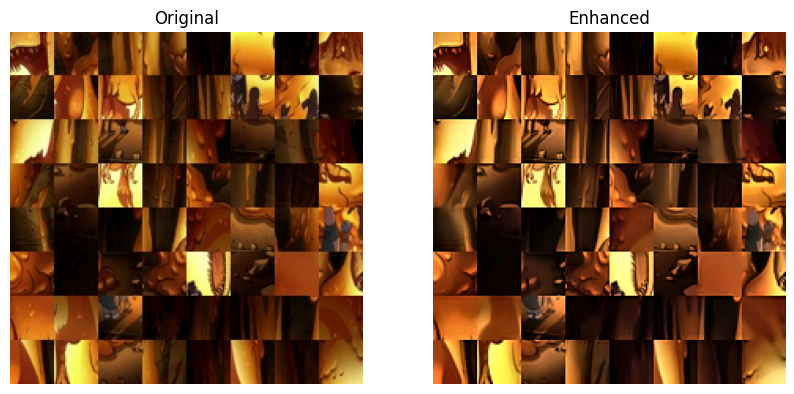

Preview → 100.jpg


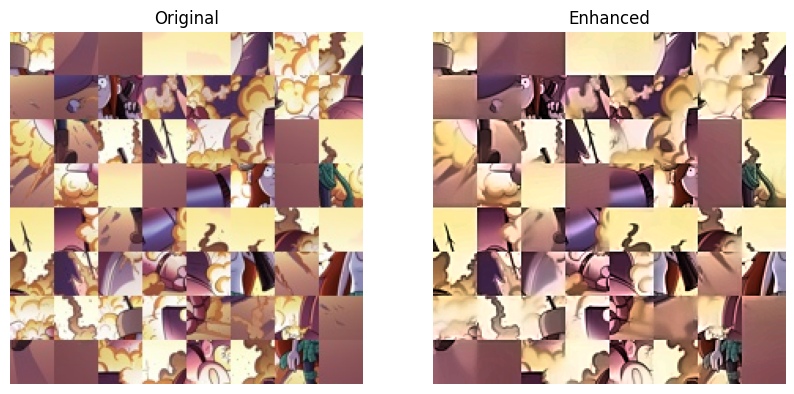

Preview → 101.jpg


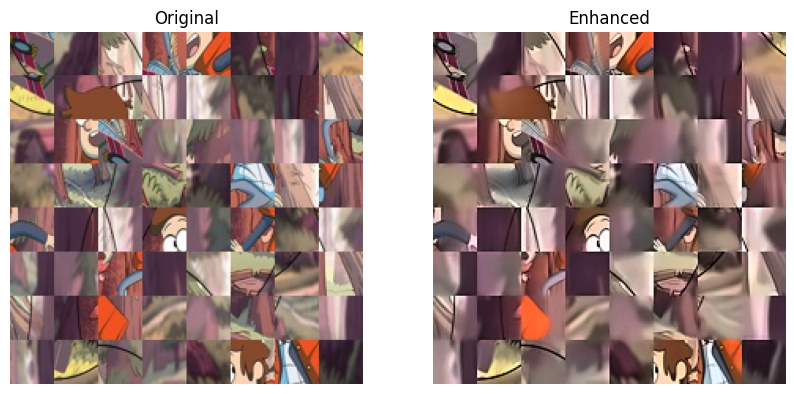

In [2]:
 
#     "puzzle_2x2": 2,
#     "puzzle_4x4": 4,
#     "puzzle_8x8": 8
# }

# os.makedirs(enhanced_root, exist_ok=True)

# # Counter for visualization (you want to SHOW only 10, but SAVE ALL)
# visualize_limit = 10
# visualize_count = 0

# for folder, grid in folders.items():
#     print(f"\nProcessing folder: {folder}")

#     in_path = os.path.join(input_root, folder)
#     out_path = os.path.join(enhanced_root, folder)
#     os.makedirs(out_path, exist_ok=True)

#     images = [
#         f for f in os.listdir(in_path)
#         if f.lower().endswith((".png", ".jpg", ".jpeg"))
#     ]

#     for filename in images:
#         img_path = os.path.join(in_path, filename)
#         img = cv2.imread(img_path)

#         # run enhancement pipeline (your updated one)
#         outputs = enhance_full_image(img)
#         enhanced_img = outputs["final"]

#         # save enhanced full image
#         save_path = os.path.join(out_path, filename)
#         cv2.imwrite(save_path, enhanced_img)
#         print(f"Enhanced → {save_path}")

#         # only show first 10 examples (NOT save only 10)
#         if visualize_count < visualize_limit:
#             show_before_after(img, enhanced_img,
#                               title1="Original",
#                               title2="Enhanced")
#             visualize_count += 1



input_root = "../data/"

folders = {
    "puzzle_2x2": 2,
    "puzzle_4x4": 4,
    "puzzle_8x8": 8
}

# Show 5 samples PER FOLDER
samples_per_folder = 5

for folder, grid in folders.items():
    print(f"\nProcessing folder: {folder}")

    in_path = os.path.join(input_root, folder)

    # get all images
    images = [
        f for f in os.listdir(in_path)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ]

    preview_count = 0  # reset counter **for each folder**

    for filename in images:
        img_path = os.path.join(in_path, filename)
        img = cv2.imread(img_path)

        # run your enhancement pipeline
        outputs = enhance_full_image(img)
        enhanced_img = outputs["final"]

        print(f"Preview → {filename}")

        # show only first 5 enhanced samples **from this folder**
        if preview_count < samples_per_folder:
            show_before_after(
                img,
                enhanced_img,
                title1="Original",
                title2="Enhanced"
            )
            preview_count += 1

        # stop previewing this folder
        if preview_count >= samples_per_folder:
            break





In [3]:
# sliced_root = "../phase1/results/"

# for folder, grid in folders.items():
#     print(f"Slicing enhanced images: {folder}")

#     in_path = os.path.join(enhanced_root, folder)
#     out_path = os.path.join(sliced_root, folder)
#     os.makedirs(out_path, exist_ok=True)

#     for filename in os.listdir(in_path):
#         if not filename.lower().endswith((".png", ".jpg")):
#             continue

#         img_path = os.path.join(in_path, filename)
#         img = cv2.imread(img_path)

#         img_save_dir = os.path.join(out_path, filename.split(".")[0])
#         os.makedirs(img_save_dir, exist_ok=True)

#         num_saved = slice_grid(img, img_save_dir, grid)
#         print(f"Sliced {filename} → {num_saved} pieces")


In [4]:



# root_data = "../data/"                # where puzzle_2x2, puzzle_4x4, puzzle_8x8 live
# output_root = "../phase1/results/"   # where sliced pieces will be saved


# puzzle_folders = {
#     "puzzle_2x2": 2,
#     "puzzle_4x4": 4,
#     "puzzle_8x8": 8
# }

# # Ensure output root exists
# os.makedirs(output_root, exist_ok=True)


 
# #   slice any image into grid_size x grid_size pieces
 
# def slice_grid(image_path, save_dir, grid_size):

#     img = cv2.imread(image_path)
#     if img is None:
#         raise ValueError(f"Failed to read image: {image_path}")

#     h, w = img.shape[:2]


#     # Compute base piece size (floor division). We'll handle remainder on the last row/column.
#     base_piece_h = h // grid_size
#     base_piece_w = w // grid_size

#     os.makedirs(save_dir, exist_ok=True)

#     index = 0                                                
#     for row in range(grid_size):
#         # y start
#         y1 = row * base_piece_h
#         # y end: for last row, use full image height to include any remainder
#         y2 = (row + 1) * base_piece_h if row < grid_size - 1 else h

#         for col in range(grid_size):
#             x1 = col * base_piece_w
#             x2 = (col + 1) * base_piece_w if col < grid_size - 1 else w

#             # crop the tile
#             piece = img[y1:y2, x1:x2]

#             # save tile with zero-padded index
#             piece_filename = f"piece_{index:03d}.png"
#             piece_path = os.path.join(save_dir, piece_filename)
#             cv2.imwrite(piece_path, piece)

#             index += 1

#     return index



# # Main processing loop: go over each configured puzzle folder

# for folder_name, grid in puzzle_folders.items():
#     input_folder = os.path.join(root_data, folder_name)
#     output_folder = os.path.join(output_root, folder_name)

#     # skip if the input folder doesn't exist
#     if not os.path.exists(input_folder):
#         print(f"Skipping '{folder_name}': input folder not found at {input_folder}")
#         continue

#     # ensure output folder exists
#     os.makedirs(output_folder, exist_ok=True)

#     print(f"\nProcessing folder: {folder_name}  (Grid: {grid}x{grid})")

#     # iterate all image files in the input folder
#     for filename in sorted(os.listdir(input_folder)):
#         if not filename.lower().endswith((".png", ".jpg", ".jpeg")):
#             continue

#         img_path = os.path.join(input_folder, filename)
#         # folder to save pieces for this image, named by the base image file (without extension)
#         img_name = os.path.splitext(filename)[0]
#         img_output_dir = os.path.join(output_folder, img_name)
#         os.makedirs(img_output_dir, exist_ok=True)

#         print(f"  - Slicing '{filename}' ...", end=" ")
#         try:
#             num_saved = slice_grid(img_path, img_output_dir, grid)
#             print(f"done ({num_saved} pieces saved).")
#         except Exception as e:
#             print(f"ERROR: {e}")

# print("\nAll done — check the output folders under:", output_root)
